In [1]:
pwd

'C:\\Users\\Admin'

In [5]:
!pip install pandas

     --------------------------------------- 10.0/10.0 MB 75.8 kB/s eta 0:00:00
     -------------------------------------- 14.0/14.0 MB 751.0 kB/s eta 0:00:00
     ------------------------------------ 507.9/507.9 kB 424.6 kB/s eta 0:00:00


In [6]:
import pandas
dataframe = pandas.read_csv('traffic.csv')
dataframe

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [8]:
dataframe.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
dataframe.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [12]:
dataframe.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

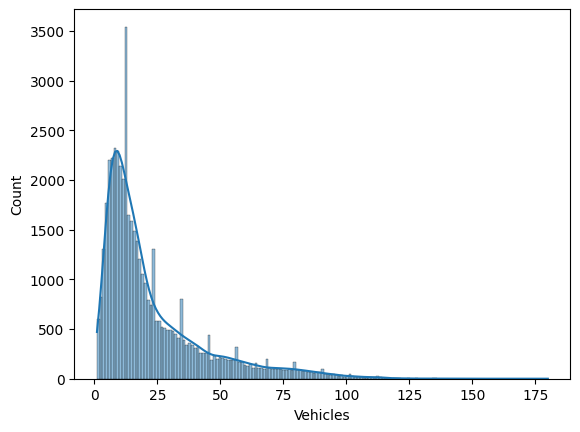

In [19]:
#data exploration
import seaborn as sns
import matplotlib.pyplot as plt
#visualize 
sns.histplot(dataframe['Vehicles'], kde= True)
plt.show()

In [20]:
#data processing
dataframe = dataframe.dropna()

In [21]:
columns_to_fill = ['Junction', 'Vehicles'] 
dataframe[columns_to_fill] = dataframe[columns_to_fill].apply(lambda col: col.fillna(col.mean()))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['numerical_column_1', 'numerical_column_2']] = scaler.fit_transform(data[['numerical_column_1', 'numerical_column_2']])

In [26]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Apply StandardScaler to the 'Junction' and 'Vehicles' columns
dataframe[['Junction', 'Vehicles']] = scaler.fit_transform(dataframe[['Junction', 'Vehicles']])

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Apply MinMaxScaler to the 'Junction' and 'Vehicles' columns
dataframe[['Junction', 'Vehicles']] = min_max_scaler.fit_transform(dataframe[['Junction', 'Vehicles']])

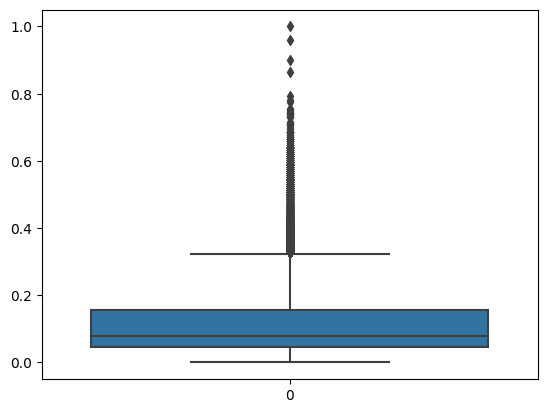

In [31]:
sns.boxplot(dataframe['Vehicles'])
plt.show()

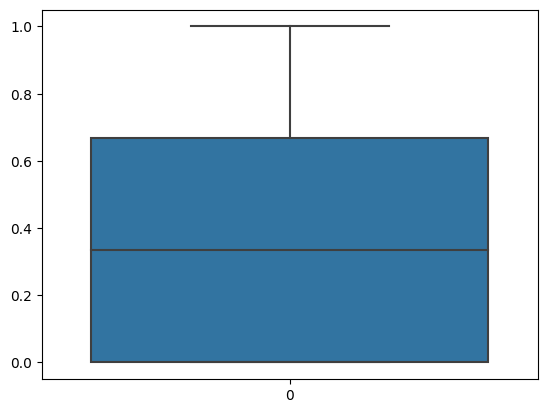

In [34]:
sns.boxplot(dataframe['Junction'])
plt.show()

In [38]:
from scipy import stats

z_scores = stats.zscore(dataframe[['Junction', 'Vehicles']])
dataframe = dataframe[(z_scores < 3).all(axis=1)]

In [41]:
from sklearn.model_selection import train_test_split

X = dataframe.drop('Junction', axis=1)  # Features
y = dataframe['Vehicles']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
dataframe.to_csv('Final_data.csv', index=False)

In [44]:
mydata= pandas.read_csv('Final_data.csv')
mydata

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,0.0,0.078212,20151101001
1,2015-11-01 01:00:00,0.0,0.067039,20151101011
2,2015-11-01 02:00:00,0.0,0.050279,20151101021
3,2015-11-01 03:00:00,0.0,0.033520,20151101031
4,2015-11-01 04:00:00,0.0,0.044693,20151101041
...,...,...,...,...
47127,2017-06-30 19:00:00,1.0,0.055866,20170630194
47128,2017-06-30 20:00:00,1.0,0.162011,20170630204
47129,2017-06-30 21:00:00,1.0,0.083799,20170630214
47130,2017-06-30 22:00:00,1.0,0.117318,20170630224


In [27]:
dataframe

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,-1.220905,-0.375489,20151101001
1,2015-11-01 01:00:00,-1.220905,-0.471875,20151101011
2,2015-11-01 02:00:00,-1.220905,-0.616454,20151101021
3,2015-11-01 03:00:00,-1.220905,-0.761034,20151101031
4,2015-11-01 04:00:00,-1.220905,-0.664648,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,1.881649,-0.568261,20170630194
48116,2017-06-30 20:00:00,1.881649,0.347408,20170630204
48117,2017-06-30 21:00:00,1.881649,-0.327296,20170630214
48118,2017-06-30 22:00:00,1.881649,-0.038137,20170630224


In [23]:
#Encoding
!pip install scikit-learn

In [17]:
!pip install matplotlib

In [14]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 953.0 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 959.0 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 886.0 kB/s eta 0:00:00
     ------------------------------------ 104.1/104.1 kB 375.4 kB/s eta 0:00:00
     -------------------------------------- 55.8/55.8 kB 364.5 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 980.1 kB/s eta 0:00:00
